# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [25]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

n_fruits = 100
n_oranges = 40
n_apples = 60

p_orange = n_oranges/n_fruits
p_apple = n_apples/n_fruits

print('probability of picking orange:', p_orange)
print('probability of picking apple:', p_apple)

probability of picking orange: 0.4
probability of picking apple: 0.6


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [ ]:
# I am ignoring the prompt to round because some of the numbers become very small here

# What is the probability that the first 5 fruits are all apples?
# multiply the probability of picking an apple 5 times
p_5_apples = p_apple ** 5
p_5_apples

0.07775999999999998

In [27]:
# What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?
# multiply with the probability of picking an orange 15 times in total
p_5_apple_then_15_orange = p_5_apples * (p_orange**15)
p_5_apple_then_15_orange

8.349416423424006e-08

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [28]:
# your solution here
# We need to multiply the probability of one particular order of picks for 5 apples and 20 oranges 
# with the number of possible ways of picking 5 apples out of 20 total picks (equivalently 15 oranges out of 20 total picks)
# This is calculated using the binomial coefficient.
def binom(totaloptions,n_pick):
    return math.factorial(totaloptions)/(math.factorial(n_pick) * math.factorial(totaloptions-n_pick))


p_5_apple_15_orange_any = binom(20,5) * p_5_apple_then_15_orange
print(p_5_apple_15_orange_any)

# alternatively using prebuilt function
p_5_apple_15_orange_any_prebuilt = math.comb(20,5) * p_5_apple_then_15_orange
p_5_apple_15_orange_any_prebuilt


0.0012944935222876579


0.0012944935222876579

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [ ]:
# your code here

total_picks = 20
k_max = 4  # We want less than 5 apples, so k ranges from 0 to 4
# Calculate cumulative probability of less than 5 apples
cumul_prob_up_to_4_apples = stats.binom.cdf(k_max, total_picks, p_apple)
print(f"Cumulative Probability: {cumul_prob_up_to_4_apples:.8f}")



Cumulative Probability: 0.00031703


In [39]:
# manual alternative by Jonathan
# P(k)=C(n,k)×pk×(1−p)**n−k

cdf_tmp = 0
for k in range(0, 5):
    cdf_tmp += binom(20, k_max) * (p_apple**k_max) * (1-p_apple)**(20-k_max)
    
print("what is the probability that less than 5 fruits picked are apples? ", cdf_tmp)

what is the probability that less than 5 fruits picked are apples?  0.001348430752382977


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [ ]:
# your code here
# Please label the axes and give a title to the plot 
# I think the task uses misleading terminology, since the abbreviation PDF normally stands for probability density function, which 
# is defined for continuous variables
# I assume for the categorical variable here, we need to calculate the probability mass function/PMF

pmf = [stats.binom.pmf(k,20,p_apple) for k in range(0,20)]
pmf

[np.float64(1.0995116277760011e-08),
 np.float64(3.298534883328002e-07),
 np.float64(4.700412208742411e-06),
 np.float64(4.2303709878681673e-05),
 np.float64(0.0002696861504765956),
 np.float64(0.0012944935222876583),
 np.float64(0.004854350708578719),
 np.float64(0.01456305212573616),
 np.float64(0.03549743955648178),
 np.float64(0.07099487911296379),
 np.float64(0.11714155053639005),
 np.float64(0.1597384780041684),
 np.float64(0.17970578775468957),
 np.float64(0.16588226561971356),
 np.float64(0.12441169921478513),
 np.float64(0.07464701952887111),
 np.float64(0.034990790404158235),
 np.float64(0.01234969073087939),
 np.float64(0.003087422682719849),
 np.float64(0.00048748779200839793)]

Text(0.5, 0, 'Apples picked')

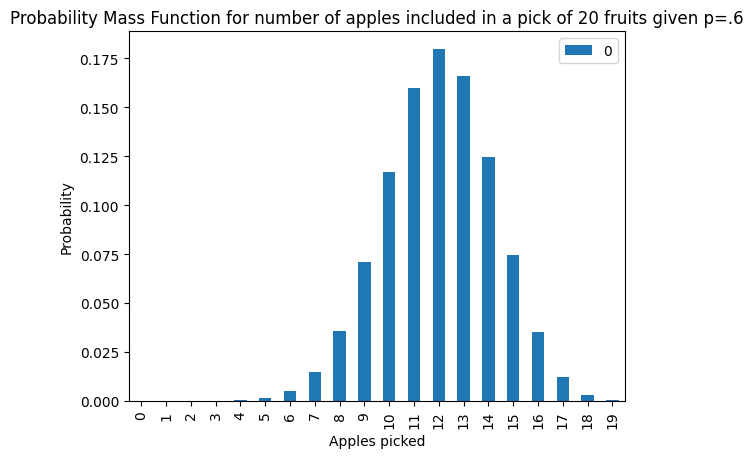

In [55]:
import pandas as pd
pmf_df = pd.DataFrame(pmf)
pmf_df.plot.bar()
plt.title('Probability Mass Function for number of apples included in a pick of 20 fruits given p=.6')
plt.ylabel('Probability')
plt.xlabel('Apples picked')

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [ ]:
# your code here
# using the stats library
stats.poisson.pmf(5,2.3)


np.float64(0.053775025581946814)

In [ ]:
# manual sanity check
# P(k)=(λ**k) * e**(−λ)​ / k!

def pois(k,lamb):
    return lamb**k * math.exp(-lamb) / math.factorial(k)

pois(5,2.3)

0.0537750255819468

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

Text(0.5, 0, 'Number of goals per match')

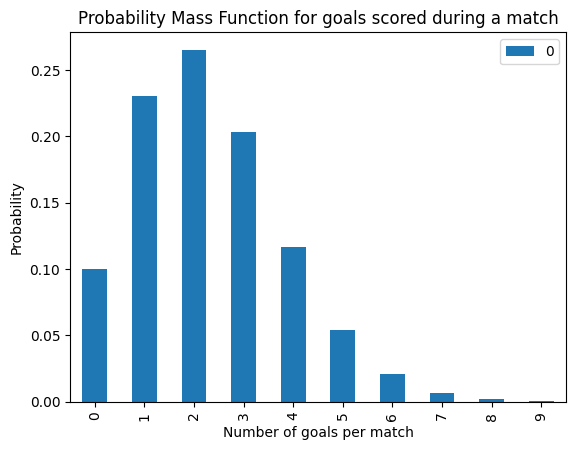

In [54]:
# your code here
# Please label the axes and give a title to the plot 

pmf_poiss = pd.DataFrame([stats.poisson.pmf(k,2.3) for k in range(10)])
pmf_poiss.plot.bar()
plt.title('Probability Mass Function for goals scored during a match')
plt.ylabel('Probability')
plt.xlabel('Number of goals per match')